# Assignement 3, Data science in practice, MGT-415, 26.04.2020
## Aubry Yannick, Fontannaz Benoît, Muret Gabriel Pierre Etienne, Tedeschi Julien Brian, Terrier Cédric

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
data = pd.read_excel('network_data.xlsx')
print(data.shape)
print(data.dtypes)
data.head()

(88234, 2)
NodeA    int64
NodeB    int64
dtype: object


,NodeA,NodeB
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [19]:
NETWORK = nx.Graph()
length_data = len(data)
for i in range(10000):
    NETWORK.add_edge(data.NodeA[i],data.NodeB[i])

<function matplotlib.pyplot.show(*args, **kw)>

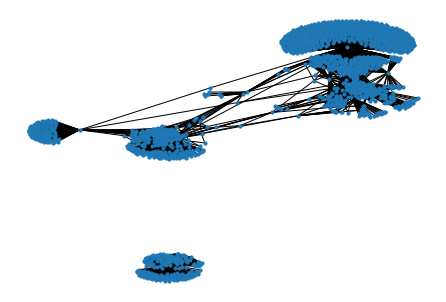

In [23]:
nx.draw(NETWORK, node_size=10)
plt.show

#draw_planar or draw_spectral or draw_circular or draw

The network with every point is represented below due to long computational time:
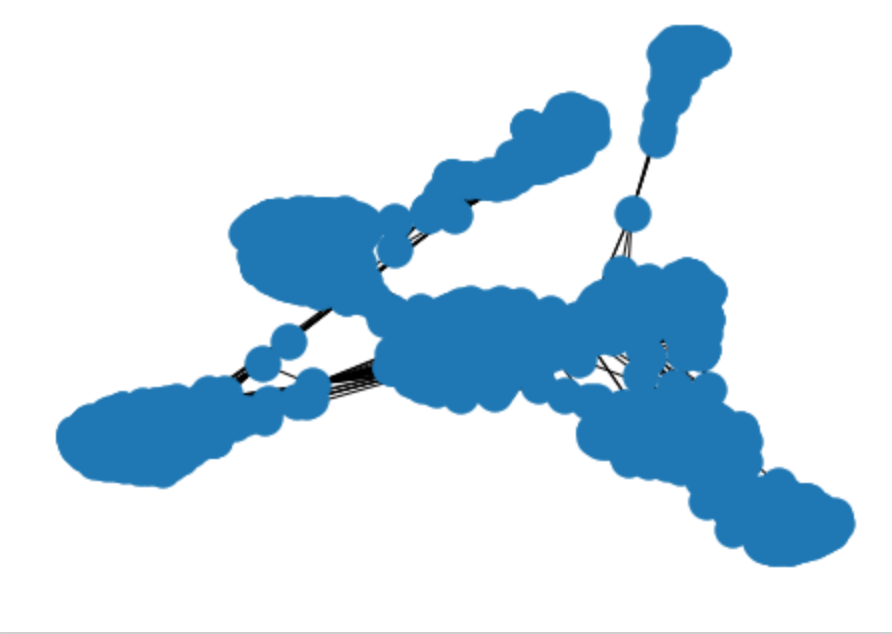

In [5]:
results1 = pd.DataFrame(NETWORK.degree(), columns = ['node','degree'])

In [6]:
degree_centrality = nx.degree_centrality(NETWORK)
results2 = pd.DataFrame(degree_centrality.items(), columns = ['node','degree_centrality'])

In [7]:
betweenness = nx.betweenness_centrality(NETWORK)
results3 = pd.DataFrame(betweenness.items(), columns = ['node','betweenness'])

In [40]:
eig_centr = nx.eigenvector_centrality(NETWORK)
results4 = pd.DataFrame(eig_centr.items(), columns = ['node','eigenvector_centrality'])

[(348, 0.1837055147302189), (483, 0.16140973082009635), (376, 0.16094413429059629), (475, 0.14557884618284353), (517, 0.1400585812950593), (559, 0.13891687095202157), (428, 0.1388525375047331), (373, 0.13686269543004412), (412, 0.136698502880147), (513, 0.1366913736929322), (561, 0.13131314698645025), (566, 0.12634836613555148), (497, 0.12357184686566919), (553, 0.11960947943267837), (465, 0.11953721404246771), (400, 0.1195368589767735), (506, 0.11889850062599307), (500, 0.11873922702193536), (353, 0.11633193650925581), (431, 0.11617527437640564)]


In [9]:
results = results1.join(results2.degree_centrality).join(results3.betweenness).join(results4.eigenvector_centrality)

Text(0.5, 1.0, 'Eigenvector centrality distribution')

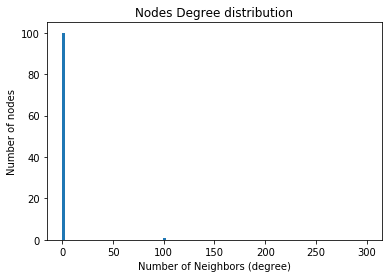

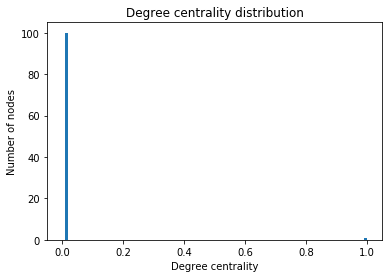

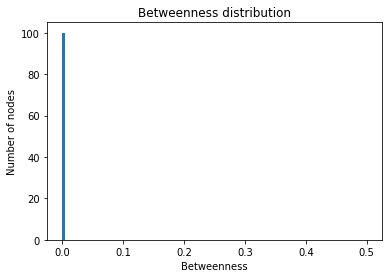

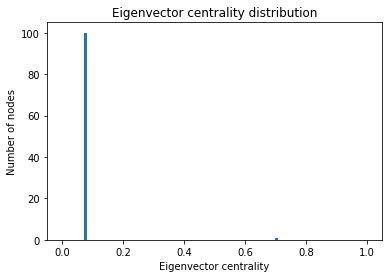

In [10]:
degree_hist = plt.hist(results.degree, 100, range = [0,300])
plt.xlabel('Number of Neighbors (degree)')
plt.ylabel('Number of nodes')
plt.title('Nodes Degree distribution')

plt.figure()
degree_hist = plt.hist(results.degree_centrality, 100, range = [0,1])
plt.xlabel('Degree centrality')
plt.ylabel('Number of nodes')
plt.title('Degree centrality distribution')

plt.figure()
degree_hist = plt.hist(results.betweenness, 100, range = [0,0.5])
plt.xlabel('Betweenness')
plt.ylabel('Number of nodes')
plt.title('Betweenness distribution')

plt.figure()
degree_hist = plt.hist(results.eigenvector_centrality, 100, range = [0,1])
plt.xlabel('Eigenvector centrality')
plt.ylabel('Number of nodes')
plt.title('Eigenvector centrality distribution')

In [11]:
density = nx.density(NETWORK)
av_path = nx.average_shortest_path_length(NETWORK)
print('The density of the network is:', density)
print("The average shortest path length of the network is:", av_path)

The density of the network is: 0.019801980198019802
The average shortest path length of the network is: 1.9801980198019802


In [44]:
eig_centr_sorted = sorted(eig_centr.items(), key=lambda x:x[1], reverse = True)
print(eig_centr_sorted[:20])
print(results.eigenvector_centrality)

[(348, 0.1837055147302189), (483, 0.16140973082009635), (376, 0.16094413429059629), (475, 0.14557884618284353), (517, 0.1400585812950593), (559, 0.13891687095202157), (428, 0.1388525375047331), (373, 0.13686269543004412), (412, 0.136698502880147), (513, 0.1366913736929322), (561, 0.13131314698645025), (566, 0.12634836613555148), (497, 0.12357184686566919), (553, 0.11960947943267837), (465, 0.11953721404246771), (400, 0.1195368589767735), (506, 0.11889850062599307), (500, 0.11873922702193536), (353, 0.11633193650925581), (431, 0.11617527437640564)]
0      0.707103
1      0.070711
2      0.070711
3      0.070711
4      0.070711
         ...   
96     0.070711
97     0.070711
98     0.070711
99     0.070711
100    0.070711
Name: eigenvector_centrality, Length: 101, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

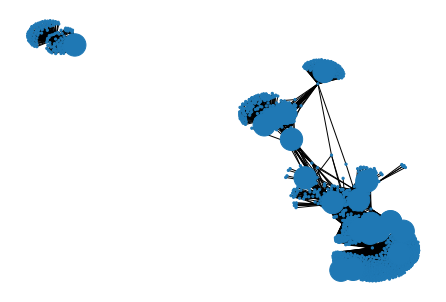

In [56]:
nx.draw(NETWORK, node_size = (results.eigenvector_centrality)*results.eigenvector_centrality*1000)
plt.show

In [12]:
#within a cluster, how many nodes to reachable in N steps, edge/edge possible

SyntaxError: invalid syntax (<ipython-input-12-83406cecfc90>, line 1)